### LIBRERÍAS PRINCIPALES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# APRENDIZAJE SUPERVISADO

### CONCEPTOS IMPORTANTES A TENER EN CUENTA:   En que parte del esquema entran a formar parte!!!!!!!!!!

Kernels:    transforman conjunto de datos en una dimensión superior

ravel():    función que transforma a vector (Numpy)

In [ ]:
#Example Kfold:

X_train_example = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y_train_example = np.array([[1], [3], [1], [3]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=4, n_repeats=1, random_state=random_state)
for train in rkf.split(X=X_train_example):
    # Izquierda -- Conjuntos de entrenamiento por iteración
    # Derecha -- Conjuntos de validación por iteración
    # n_repeats -- Representa el número de batches que van a ocurrir durante nuestro entrenamiento
    print(train)

In [ ]:
# Con un sólo bacht

from sklearn.model_selection import KFold

# define the model
model = RandomForestClassifier()
# evaluate the model 
# THIS DOESN'T TRAIN THE MODEL
k_fold = KFold(n_splits=10, random_state=2)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# ENTRENANDO

k_fold = KFold(n_splits=33, random_state=1)
val_score = []
train_score = []
# define the model
model = RandomForestClassifier()
for train, val in k_fold.split(X_train):
    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

# EN UNA LINEA
k_fold = KFold(n_splits=4, random_state=1)

[model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]

In [ ]:
# CON 3 BATCHES

# define the model
model_batches = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2)
n_scores = cross_val_score(model_batches, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# PASOS QUE TODOS LOS MODELOS DE APRENDIZAJE SUPERVISADO TIENEN EN COMÚN:

CARGAMOS LIBRERÍAS NECESARIAS DE NUESTRO MODELO

CARGAMOS EL DATASET CORRESPONDIENTE

In [ ]:
df = pd.read_csv("PAHT DEL ARCHIVO")
df.info()

In [ ]:
Tratamos el dataset de la manera más adecuada para limpiar nuestro datos
    Si hay alguna columna con muchos Nan lo bueno sería quitarla
df = df.dropna()
    esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta, esto quita filas y por tanto no se lo podremos aplicar       al dataset de predicción
    Si hay pocos Nan y la columna puede servir podemos cambiar Nan por O
df.fillna(0, inplace=True)
    
    Quitar otras columnas es decisión vuestra como futuros data scientists 
df.drop("0",1,inplace = True) -- eliminar alguna columna...

    Cambiar algunas filas si guarda correlación de string a int para que nuestro modelo pueda trabajar con ella
from sklearn import preprocessing
Este transformador debe usarse para codificar valores objetivo, es decir y , y no la entrada X.
 
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
LabelEncoder()
le.classes_
array([1, 2, 6])
le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])
 


In [ ]:
# otra forma de conseguir el transform de todo el dataframe a la vez:
class MultiColumnLabelEncoder:
       def __init__(self,columns = None):
           self.columns = columns # array of column names to encode

       def fit(self,X,y=None):
           return self # not relevant here

       def transform(self,X):
           '''
           Transforms columns of X specified in self.columns using
           LabelEncoder(). If no columns specified, transforms all
           columns in X.
           '''
           output = X.copy()
           if self.columns is not None:
               for col in self.columns:
                   output[col] = LabelEncoder().fit_transform(output[col])
           else:
               for colname,col in output.iteritems():
                   output[colname] = LabelEncoder().fit_transform(col)
           return output

       def fit_transform(self,X,y=None):
           return self.fit(X,y).transform(X)class MultiColumnLabelEncoder:


# Transformamos el datafrema df para las columnas que sean string los convierta a números. Hay que llamar a la función:
encoding_pipeline = Pipeline([
       ('encoding',MultiColumnLabelEncoder(columns=['2','4','6','7','8','12','13','15','17']))
       # add more pipeline steps as needed
])
df_transformacion = encoding_pipeline.fit_transform(df)
df_transformacion  

In [ ]:
Importante para el análisis de datos puede ser:
    * Exploración de datos del análisis del dataset
sns.pairplot(df) --> obtenemos las gráficas de una forma correlacionada
    * Comprobar la correlación entre las columnas
df.corr()
    * Comprobar la correlación entre las columnas de una forma visual
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df_transformacion.corr(), annot = True, cmap="YlGnBu")
    * Cualquier otra gráfica que nos permita entender nuestros datos
# Codigo de la matriz de correlación para que se incluya asi mism
df.corr().Murder.sort_values(ascending = False)[1:].head()
(El [1:] es para que no se incluya a sí mismo)
Para entender el código te aconsejo que ejecutes en diferentes celdas estos trocitos de código:
df.corr()
df.corr().Murder
df.corr().Murder.sort_values()
df.corr().Murder.sort_values(ascending = False)
df.corr().Murder.sort_values(ascending = False).head()
df.corr().Murder.sort_values(ascending = False)[1:].head() (editado) 

#### 1. Definir X e y

In [ ]:
Una vez terminado de hacer todos lo ajustes en nuestro dataset procedamos a prepararlo para el modelo
Definimos X e y, ambos tienen que ser array. 
    Formas de convertir una columna en un array:
# Cuando se trata de un dataframe
X = df["Avg. Area Income"].values
y = df["Price"].values

# Cuando se trata de un dataframe
X = df["Avg. Area Income"].to_numpy()
y = df["Price"].to_numpy()

# Cuando se trata de una lista
X = np.array(lista_edad)    --> X = np.array(df[["1","3","5","9"]])
y = np.array(lista_altura)  --> y = np.array(df['17'])

Si X.shape la solución es (100,) --> VECTOR
Si X.reshape(-1, 1).shape la solución es (100, 1) --> MATRIZ
# Importante aplicar reshape
X = X.reshape(-1, 1)  # IMPORTANTE DEFINIR AQUI LA CONVERSIÓN DEL ARRAY, para no tener que ponerlo en cada linea de codigo del plt
# Cuando nos enfrentamos a arrays de imágenes. Importante que la matriz sea cuadrada. Ej:
k = np.rashape(imagen, (8,8)) # 8x8 = 64 pixels

In [ ]:
Está bien comprobar shape, nos muestra las dimensiones de un array
X.shape
y.shape
La X y la y han de coincidir con la misma dimensión sino va a dar errores en el modelo. De ahí muchas veces lo de reshape

#### 2. Dividir X_train, X_test, y_train, y_test#### 

In [ ]:
 # Utilizamos split que divide el conjunto de entrenamiento y conjunto de test. Si no dicen nada:
 # Conjunto de entrenamiento = 80 %
 # Conjunto test = 20 %
 # Se coloca en test_size = 0.20 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train
y_train

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [ ]:
Ejemplo: Si nuestro modelo es de regresión lineal
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

En este apartado importando su librería correspondiente es donde aplicamos el modelo

#### 4. Entrenar el modelo con X_train, y_train

In [ ]:
model.fit(X_train, y_train)

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred#### 

In [ ]:
predictions = model.predict(X_test)
print(predictions)

#### 6. Sacar métricas, valorar el modelo 

In [ ]:
Obtenemos el porcentaje de nuestro X_test de los aciertos 
model.score(X_test,y_test)

# * MODELOS DE REGRESIÓN

## REGRESION LINEAL

Importamos librerías:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Dividimos los datos para su futuro entrenamiento

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)

Forma de dibujar la regresión lineal

In [ ]:
#  Generamos el modelo
lm = LinearRegression(n_jobs=-1) # usa todos los procesadores del ordenador
# Entrenamos el modelo
lm.fit(X,y)
# Visualización de nuestros datos y dibujar la línea de regresión lineal
plt.scatter(X,y, edgecolor='White')
plt.plot(X, lm.predict(X), color='k')
plt.show()

### Función para dibujar de un dataframe los datos y la regresión lineal

In [ ]:
for elem in df.columns:
    X = df[elem].values.reshape(-1, 1)
    y = df["Price"]
   
    new_model = LinearRegression()
    new_model.fit(X,y)
    plt.scatter(X,y, edgecolor='White')
    plt.plot(X, new_model.predict(X), color='k')
    plt.show()

* Evaluación del modelo

In [ ]:
# y = a + bX

## lm = model = lin_reg
# b, pendiente
b = lin_reg.coef_ 

# a, secante
a = lin_reg.intercept_

# Ejemplo para datraframe
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

* Predicción del modelo

In [ ]:
new_home = np.array([[100000.0, 20.0, 8.0, 9.0, 100000.0], [200000.0, 40.0, 16.0, 18.0, 110000.0]])
lm.predict(new_home)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')

# Cuando hacemos una predicción del modelo la forma de ver si es bueno visualmente
plt.scatter(y_test, predictions) --> y_test son datos reales, predictions son datos predecidos

* Dibujamos el histograma

In [ ]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

* Cálculo de errores
Calculando el error medio absoluto, el error medio al cuadrado y el error medio al cuadrado de la raíz

    MAE es el más fácil de entender, porque es el error promedio.
    MSE es más popular que el MAE, porque la MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
    RMSE es incluso más popular que MSE, porque RMSE es interpretable en las unidades "y".
Todas estas son funciones de pérdida, porque queremos minimizarlas.

In [ ]:
from sklearn import metrics
# Se pueden importar las librerías una a una
from sklearn.metrics import mean_squared_error

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

* Función para cálculo de errores

In [ ]:
train_errors, val_errors = [], []

def plot_learning_curves(model, X, y, test_size=0.05):
    # Dividimos los datos para su futuro entrenamiento
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        # Entrenamos los datos
        model.fit(x, y)
        # Predecimos el modelo
        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)
        # Añadimos a nuestra lista la media de errores absolutos tanto en conjunto de entrenamiento como en                 validación
        train_errors.append(mean_absolute_error(y, y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))
       
        print("##### ITERACIÓN " + str(m) + " #####")
        print("x", x)
        print("y", y)
        print("y_train_predict", y_train_predict)
        print("-----\nX_val\n", X_val)
        print("y_val_predict", y_val_predict)


## model es lo mismo que lin_reg
model = LinearRegression()
# Dibujamos los datos y la línea de regresión lineal
plot_learning_curves(lin_reg=model, X, y)
# Dibujamos los errores reales
plt.plot(train_errors, "r-+", linewidth=2, label="train")
# Dibujamos lo errores de validación
plt.plot(val_errors, "b-", linewidth=3, label="val")

* Porcentaje de error --> Scores

In [ ]:
lm.score(X_train, y_train) * 100 # Entrenamiento
lm.score(X_test, y_test) * 100  # Test
lm.score(X, y) * 100  # Test

## REGRESIÓN POLINÓMICA NO LINEAL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
X = df[df.columns[:-1]].values
y = df["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

#######

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train) # X_poly aprende lo que ha sacado de cada uno de los coeficientes del modelo
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred)*100, " %")

#### Otra forma aplicando una función con min y max:

In [ ]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 10
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("-----------------")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train,y_train)

    #######
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)
    
    print(degree)
    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))

#### Forma gráfica

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print(X_poly)
print(X_poly.shape)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

## SVM --> SVR

In [ ]:
## SVM
TIENE DOS TIPOS 

    SVR --> algoritmo de regresión

    SVC --> algoritmo de clasificación

    Kernels: transforman conjunto de datos en una dimensión superior. Hay problemas que no se pueden resolver usando un hiperplano recto. En esos casos, SVM utiliza un Kernel que tranforma un conjunto de datos en una dimensión superior (realiza una operación sobre cada punto).
Hay diferentes Kernels que son utilizados según la distribución de los datos.
TIPOS:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [ ]:
X = df.iloc[:,-1].values.astype(float)
y = df["Price"].values.astype(float)

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
# Normalizar
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))  # cuidado con reshape que a veces no hace falta ponerlo porque es un array
y = sc_y.fit_transform(y.reshape(-1, 1))
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X)
# 6 Visualización de los resultados de la regresión de vectores de soporte
plt.scatter (X, y, color = 'magenta') 
plt.plot (X, y_pred, color = 'green') 
plt.title ('USA_Housing') 
plt .xlabel ('Nivel de posición') 
plt.ylabel ('Price') 
plt.show ()

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    model = svr.fit(X, y)
    y_prediction = model.predict(X)
    axes[ix].plot(X, y_prediction, color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# * MODELOS DE CLASIFICACIÓN

## REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# COMPROBAR QUE LIBRERÍAS VAN PARA CADA CASO

In [ ]:
url = https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

REGRESION LOGÍSTICA
# Creamos modelo

X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

# creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
Hay dos formas de crear el modelo. Es lo mismo pero importando de diferente manera las librerías.
# Si importamos la librería así podemos crear el modelo de esta manera:
from sklearn.linear_model import LinearRegression
"""Estás trayendo del módulo linear_model de sklearn la función LogisticRegression() y por tanto puedes hacer alusión en ese archivo a esa función sin especificar de dónde viene"""
logisticRegr = LogisticRegression()


from sklearn import linear_model 
"""entonces si hace falta que especifiques el modulo y la función que quieres de ese modulo cada vez que vayas a usarla"""
model = linear_model.LogisticRegression()


# Entrenamos modelo
model.fit(X,y) --> toma todos los datos sin tener en cuenta train y test 
Lo ideal para generar un buen modelo es:
model.fit(X_train, y_train) --> toma los datos de entrenamiento, y asi los podemos comparar con los de test

p class=””>LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class=’ovr’, n_jobs=1,
penalty=’l2′, random_state=None, solver=’liblinear’, tol=0.0001,
verbose=0, warm_start=False)

# Una vez completado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.
predictions = model.predict(X)

model.score(X,y) --> da un porcentaje Con este método puedes obtener el porcentaje de train, test, val de todos los ciertos de tu modelo

# Validación de nuestro modelo:
Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
#Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring 

________________________
El procedimiento de validación cruzada k-fold es un método estándar para estimar el rendimiento de un algoritmo de aprendizaje automático en un conjunto de datos.
valor común para k es 10

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
Al ejecutar el ejemplo, se crea el conjunto de datos y luego se evalúa un modelo de regresión logística en él mediante una validación cruzada de 10 veces. Luego se informa la precisión de clasificación media en el conjunto de datos.
________________________
VALIDACIÓN DEL MODELO:
Kfold --> divide el conjunto de entrenamiento y validación. Si el conjunto de validación es más alto que el de entranmiento implica que hay un sobreentrenamiento.

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

predictions = model.predict(X_validation)
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Matriz de confusión para regresión logística:  SÓLO ES PARA MODELOs DE CLASIFICACION.

In [ ]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
# forma matemática

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
# forma visual

Probabilidades:

In [ ]:
logisticRegr.predict(x_test[0:1])  # te devuelve un array con un número que es la posición donde se encuentra.
logisticRegr.predict_proba(x_test[0:1]) # predice la probabilidad en cada posición.
logisticRegr.classes_ # classes_ es el atributo que no dice la clase
max(logisticRegr.predict_proba(x_test[0:1])[0]) # calcula el máximo en número x_test[0:1]es la primera imagen.

## KNN

In [ ]:
url = https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

MÉTODO QUE NO APRENDE VALORES SOBRE LOS DATOS, aprende las características de los datos.
Utiliza todo el dataset para entrenar. Es muy bueno para pequeños dataset.
Lógica:
     creamos conjunto de datos     
     entrenamos modelo en el conjunto de entrenamiento
     elegimos valor k
     introducimos nueva instancia
     analizamos los k de alrededor más cercanos
     elegir de que clase es el nuevo miembro

KNN
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
--------------------
from sklearn import preprocessing
le = preprocessing.LabelEncoder()   # creamos modelo
# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)  # a las palabras le asigna valores
temp_encoded = le.fit_transform(temp)
y = le.fit_transform(play)
# Como está en una lista lo pasamos a array
import numpy as np
weather_encoded = np.array(weather_encoded)
temp_encoded = np.array(temp_encoded)
y = np.array(y)
X = np.array(list(zip(weather_encoded,temp_encoded))) # agrupamos transformando en lista
# Train the model using the training sets
model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'
from sklearn.model_selection import train_test_split
# Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.neighbors import KNeighborsClassifier
m_neigbors es = k
model = KNeighborsClassifier(n_neighbors=6)

y_pred = model.predict(X_test)
from sklearn import metrics
"""
Modelo de precisión que te dice cuántas veces el clasificador es corecto
"""
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #y_test=target verdadero, y_pred=target predicho

KNN 
# Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # transform cambia de filas a columnas
X_test = scaler.transform(X_test)
# Usemos k-Nearest Neighbor con Scikit Learn
Definimos el valor de k en 7 (esto realmente lo sabemos más adelante, ya veréis) y creamos nuestro clasificador.
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
# Precisión del modelo:

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

#######
# Elegir el mejor valor de k
(sobre todo importante para desempatar o elegir los puntos frontera!)
Antes vimos que asignamos el valor n_neighbors=7 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente tuve que ejecutar este código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## SVM
TIENE DOS TIPOS 

    SVR --> algoritmo de regresión

    SVC --> algoritmo de clasificación

In [ ]:
Para encontrar los mejores parámetros para SVM, el data3_params() prueba diferentes combinaciones de C y gamma y devuelve la mejor elección de ellos para SVM con el kernel RBF.


def data3_params(X, y, X_val, y_val):
    """
    Returns the best choice of C and gamma for SVM with RBF kernel.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels for training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Cross validation samples, where n_val_samples is the number of cross validation samples and n_features is the
        number of features.
    y_val : ndarray, shape (n_val_samples,)
        Labels for cross validation set.

    Returns
    -------
    C : float
        The best choice of penalty parameter C of the error term.
    gamma : float
        The best choice of kernel coefficient for 'rbf'.
    """
    C_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    gamma_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    max_score = -1
    C_pick = -1
    gamma_pick = -1
    for C in C_cands:
        for gamma in gamma_cands:
            clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X, y)
            score = clf.score(X_val, y_val)
            if score > max_score:
                max_score = score
                C_pick = C
                gamma_pick = gamma

    return C_pick, gamma_pick


Entrena a SVM y traza el límite de decisión:

C, gamma = data3_params(X, y, X_val, y_val)
print("C", C)
print("gamma", gamma)
# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print ('score:', clf.score(X_val, y_val))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

## ARBOLES DE DECISIÓN

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0


In [ ]:
.....

In [ ]:
#Clasificación de los árboles de decisión:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
Ejemplo kfold.... No me queda claro cómo va este modelo

https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

## XGBOOST

In [ ]:
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder


In [ ]:
Ejemplo:
df = pd.read_csv("../data/student-mat.csv")

X = df.drop(columns=["Fjob"])
y = df[["Fjob"]]

* Ejemplo encoder 1 -- Menos usado

No ejecutar todo seguido porque esto cambia el resultado posterior. 

Es un ejemplo, no forma parte del ejercicio. Después seguiremos con él.

y_ = y.copy()
y_ = y_["Fjob"].map({"teacher": 1})
y_

def encoder_serie(serie):
    encoder = {}
    for i, x in enumerate(serie):
        if not (x in encoder):
            encoder[x] = i
    serie = serie.map(encoder)
    return serie, encoder
        
serie, encoder = encoder_serie(serie=y["Fjob"])
print(serie)
print(encoder)


serie_Fjob, encoder_Fjob = encoder_serie(serie=y["Fjob"])
y["Fjob"] = serie_Fjob
y

In [ ]:
Ejemplo encoder 2 más usado

No ejecutar todo seguido porque esto cambia el resultado posterior. 

Es un ejemplo, no forma parte del ejercicio. Después seguiremos con él.
le_Mjob = LabelEncoder()
le_Mjob.fit(X["Mjob"])
list(le_Mjob.classes_)

m_job = le_Mjob.transform(X["Mjob"])
m_job

print(list(le_Mjob.inverse_transform(m_job)))


#### Usamos encoder 2

In [ ]:
le_Fjob = LabelEncoder()
le_Fjob.fit(y["Fjob"])
y["Fjob"] = le_Fjob.transform(y["Fjob"]) 

df.select_dtypes('object').columns.tolist()

# Encode all columns
X_categorical_no_numbers = X[X.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
X_categorical_no_numbers

X_others = X.select_dtypes(exclude=['object'])
X_others 

X = pd.concat([X_categorical_no_numbers,X_others], axis=1)
X

y.values.shape
X = X.values
y = y.values

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed) 

model = XGBClassifier() 
model.fit(X_train, y_train) 
#Make predictions for test data 
y_pred = model.predict(X_test)
y_pred.shape

model.score(X_test, y_test)model.score(X_test, y_test)

# GridSearch
GridSearch es una herramienta de optimización que usamos cuando afinamos los hiperparámetros. Definimos la cuadrícula de parámetros que queremos buscar y seleccionamos la mejor combinación de parámetros para nuestros datos.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

# 'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 

parameters = {
    'kernel':('linear', 'rbf', 'sigmoid'), 
    'C':[0.0001,0.1, 0.5, 1, 5, 10, 100], 
    'degree': [1,2,3,4,5,6,7,8,9],
    'coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'gamma': ('scale', 'auto')
    }

svc = svm.SVC()

clf = GridSearchCV(estimator=svc, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(iris.data, iris.target)

print("clf.best_stimator_", clf.best_estimator_)
print("clf.best_params_", clf.best_params_)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

In [ ]:
La forma pro es la que hace esto mismo y va recogiendo los errores de entrenamiento, de validación y tiene la capacidad de parar el proceso cuando se requiera además de guardar el modelo en local una vez terminado si es mejor que el que había anteriormente y de cargar el modelo anterior y seguir reentrenando.

In [ ]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
# Set random seed
np.random.seed(0)


# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
to_test = np.arange(1, 10)
# Create a pipeline

# Le podemos poner cualquier clasificador. Irá cambiando según va probando pero necesita 1.
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

svm_params = {
    'classifier': [svm.SVC()],
    'classifier__kernel':('linear', 'rbf', 'sigmoid'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__degree': to_test,
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    random_forest_params,
    svm_params
    ]

In [ ]:
%%time

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# Create grid search 
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=0, n_jobs=-1)

# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
#SAVE MODEL
# save the model to disk
filename = 'finished_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(file="finished_model.sav")
# Predict target vector
best_model.score(X_test, y_test) * 100

# GRÁFICAS CON PLOTY PARA REPRESENTAR MODELOS LOGARÍTMICOS:

In [ ]:
# Sería una buena forma de representar mis datos sino fuera porque es muy amplio el conjunto de datos
fig = px.scatter_matrix(df)
fig.show()

In [1]:
# Gráfica simple real vs predicha
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.iris()
X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

In [2]:
# Regresion lineal
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [3]:
#Generalización de modelos sobre datos invisibles:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = px.data.tips()
X = df.total_bill[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, df.tip, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [4]:
# Para knn (Clasificación):
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [5]:
# Comparación de diferentes parámetros de modelos kNN
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, df.tip)
y_dist = knn_dist.predict(x_range.reshape(-1, 1))

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, df.tip)
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', color='sex', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show()

In [6]:
# Visualización de coeficientes para regresión lineal múltiple (MLR)
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = px.data.iris()

X = df.drop(columns=['petal_width', 'species_id'])
X = pd.get_dummies(X, columns=['species'], prefix_sep='=')
y = df['petal_width']

model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting petal width'
)
fig.show()

# COMPARAR ALGORITMOS

In [4]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np

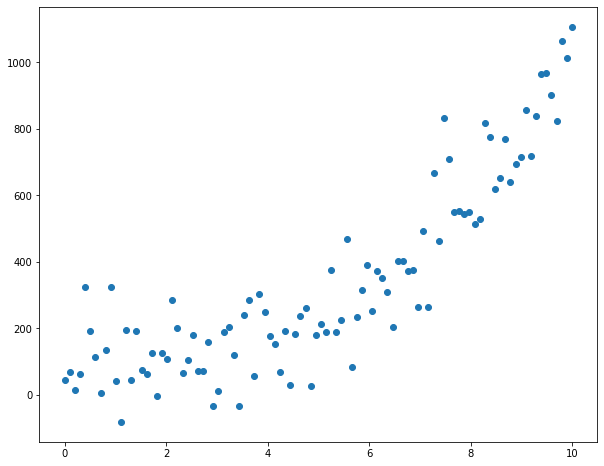

In [5]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [6]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train = X_train.reshape(-1, 1)

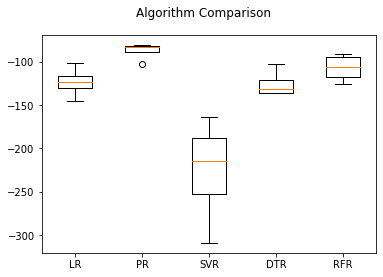

In [8]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, random_state=7)
    if name == 'PR':
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    else:
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
para clasificar por clases
dataframe.groupby('clase').size()

para crear modelo
dataframe.drop(['clase'], 1)